In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
import scipy.stats as st
import math
import statistics

In [3]:
file = "sales+school.csv"
schools_df = pd.read_csv(file)
schools_df.head()

,MLS ID,Sale Price,Close Date,Address,Zip Code,Total Sq. Ft.,Lot Size,Latitude,Longitude,High School,High School Rank,Middle School,Middle School Rank,Elementary School,Elementary School Rank
0,2001944,240000.0,2021-03-15,4917 BlueStem DR,80917,1170.0,711.0,38.8976243,-104.737074,Doherty High School,2.0,Russell Middle School,2.0,Carver Elementary School,1.0
1,8359484,237500.0,2021-03-12,54 Villa DR,81001,2087.0,6509.0,38.8654252,-104.863362,Coronado High School,3.0,Holmes Middle School,3.0,Howbert Elementary School,3.0
2,7312436,275000.0,2021-03-15,132 Hayden ST,80813,2503.0,9583.0,38.750711,-105.176383,Cripple Creek-Victor Junior-Senior High School,1.0,NaN,NaN,Cresson Elementary School,1.0
3,1398523,566455.0,2021-03-18,6596 Wolf Gulch DR,80924,4714.0,9088.0,38.9603997,-104.703074,Liberty High School,4.0,Chinook Trail Middle School,NaN,Legacy Peak Elementary School,3.0
4,4306524,410000.0,2021-03-12,6562 Tillamook DR,80925,1949.0,6600.0,38.8338816,-104.821363,Palmer High School,3.0,NaN,2.0,Coperni 2,NaN


In [4]:
data_df = schools_df.copy()
data_df = data_df.rename(columns = {"Total Sq. Ft.":"Total Sq Ft"})
data_df.head()

,MLS ID,Sale Price,Close Date,Address,Zip Code,Total Sq Ft,Lot Size,Latitude,Longitude,High School,High School Rank,Middle School,Middle School Rank,Elementary School,Elementary School Rank
0,2001944,240000.0,2021-03-15,4917 BlueStem DR,80917,1170.0,711.0,38.8976243,-104.737074,Doherty High School,2.0,Russell Middle School,2.0,Carver Elementary School,1.0
1,8359484,237500.0,2021-03-12,54 Villa DR,81001,2087.0,6509.0,38.8654252,-104.863362,Coronado High School,3.0,Holmes Middle School,3.0,Howbert Elementary School,3.0
2,7312436,275000.0,2021-03-15,132 Hayden ST,80813,2503.0,9583.0,38.750711,-105.176383,Cripple Creek-Victor Junior-Senior High School,1.0,NaN,NaN,Cresson Elementary School,1.0
3,1398523,566455.0,2021-03-18,6596 Wolf Gulch DR,80924,4714.0,9088.0,38.9603997,-104.703074,Liberty High School,4.0,Chinook Trail Middle School,NaN,Legacy Peak Elementary School,3.0
4,4306524,410000.0,2021-03-12,6562 Tillamook DR,80925,1949.0,6600.0,38.8338816,-104.821363,Palmer High School,3.0,NaN,2.0,Coperni 2,NaN


In [5]:
data_df["dollar/sqft"] = (data_df["Sale Price"] / data_df["Total Sq Ft"]).astype(float)
data_df

,MLS ID,Sale Price,Close Date,Address,Zip Code,Total Sq Ft,Lot Size,Latitude,Longitude,High School,High School Rank,Middle School,Middle School Rank,Elementary School,Elementary School Rank,dollar/sqft
0,2001944,240000.0,2021-03-15,4917 BlueStem DR,80917,1170.0,711.0,38.8976243,-104.737074,Doherty High School,2.0,Russell Middle School,2.0,Carver Elementary School,1.0,205.128205
1,8359484,237500.0,2021-03-12,54 Villa DR,81001,2087.0,6509.0,38.8654252,-104.863362,Coronado High School,3.0,Holmes Middle School,3.0,Howbert Elementary School,3.0,113.799713
2,7312436,275000.0,2021-03-15,132 Hayden ST,80813,2503.0,9583.0,38.750711,-105.176383,Cripple Creek-Victor Junior-Senior High School,1.0,NaN,NaN,Cresson Elementary School,1.0,109.868158
3,1398523,566455.0,2021-03-18,6596 Wolf Gulch DR,80924,4714.0,9088.0,38.9603997,-104.703074,Liberty High School,4.0,Chinook Trail Middle School,NaN,Legacy Peak Elementary School,3.0,120.164404
4,4306524,410000.0,2021-03-12,6562 Tillamook DR,80925,1949.0,6600.0,38.8338816,-104.821363,Palmer High School,3.0,NaN,2.0,Coperni 2,NaN,210.364289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4349,4628075,890000.0,2021-04-12,16 Polo DR,80906,3063.0,10890.0,38.7974702,-104.841016,Palmer High School,5.0,NaN,5.0,NaN,NaN,290.564806
4350,5664354,915000.0,2021-04-12,17925 Black Squirrel RD,80908,4808.0,625086.0,39.092056,-104.627332,Smoky Hill High School,NaN,NaN,NaN,Talbott Steam Innovation School,NaN,190.307820
4351,1719141,925000.0,2021-04-09,390 Paisley DR,80906,4822.0,13068.0,38.7435755,-104.835224,Mitchell High School,2.0,NaN,NaN,Stratmoor Hills Elementary School,5.0,191.829117
4352,3250460,990900.0,2021-04-15,4937 Rainbow Gulch TR,80924,6140.0,12120.0,38.9758208,-104.735368,Liberty High School,4.0,NaN,NaN,Pinello Elementary School,5.0,161.384365


<IPython.core.display.Javascript object>


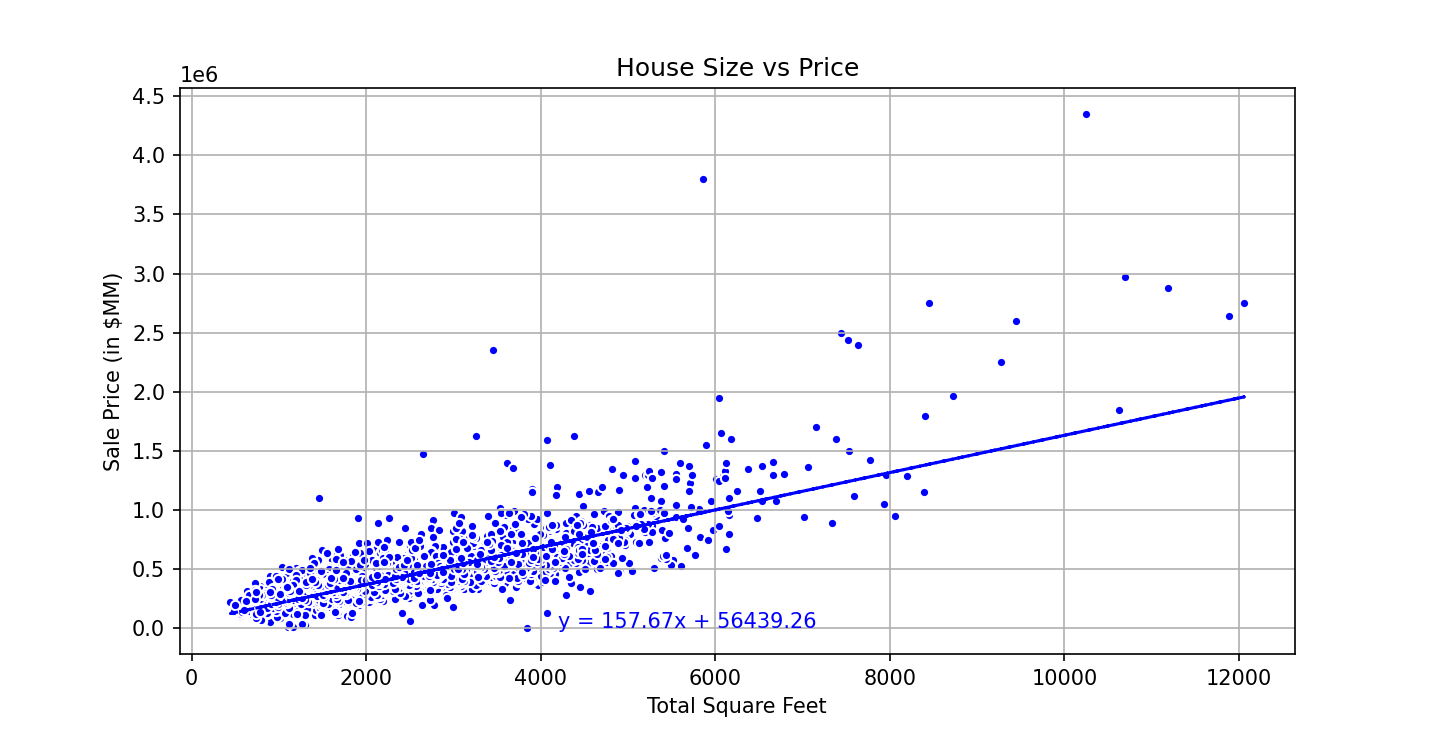

In [6]:
#  Base Graph
# Total Sq Ft vs Price
data_df.plot(kind='scatter', x="Total Sq Ft", y="Sale Price", edgecolor='white', color='blue', title="House Size vs Price",
            yticks=(np.arange(0,5000000,500000)))
plt.grid()
plt.ylabel("Sale Price (in $MM)")
plt.xlabel("Total Square Feet")
x_axis = data_df['Total Sq Ft']
y_axis = data_df['Sale Price']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(4200,10),fontsize=10,color="blue")
plt.plot(x_axis, regress_values,"b--")
plt.savefig("Images/graph1-size-vs-price.png")
plt.show()

In [20]:
nohs_df = data_df[data_df['High School'].isna()]
nohs_df.head()

,MLS ID,Sale Price,Close Date,Address,Zip Code,Total Sq Ft,Lot Size,Latitude,Longitude,High School,High School Rank,Middle School,Middle School Rank,Elementary School,Elementary School Rank,dollar/sqft
16,6036339,150500.0,2021-03-15,1137 Van Buren ST,81004,780.0,9365.4,38.8677835,-104.803721,NaN,3.0,West Middle School,2.0,West Elementary School,4.0,192.948718
40,5615163,325000.0,2021-03-09,508 Rowe LN,80911,2394.0,7900.0,38.7279834,-104.708825,NaN,2.0,Janitell Junior High School,3.0,Grand Mountain School,3.0,135.756057
48,9227549,16000.0,2021-01-05,37131 Highway 24 HW,80830,1163.0,16030.0,39.1714478,-103.972425,NaN,NaN,Falcon Middle School,NaN,High Plains Elementary School,NaN,13.757524
49,7674186,120000.0,2021-01-07,1020 Ruppel ST,81001,1790.0,7150.0,38.2843445,-104.592637,NaN,1.0,North Middle School,0.0,Skyway Park Elementary School,2.0,67.039106
53,3243865,160000.0,2021-01-04,935 Saturn DR #4,80905,810.0,214.0,38.80686,-104.845234,NaN,5.0,NaN,5.0,Coperni 2,4.0,197.530864


In [21]:
hs_df = data_df[data_df['High School'].notna()]
hs_df.head()

,MLS ID,Sale Price,Close Date,Address,Zip Code,Total Sq Ft,Lot Size,Latitude,Longitude,High School,High School Rank,Middle School,Middle School Rank,Elementary School,Elementary School Rank,dollar/sqft
0,2001944,240000.0,2021-03-15,4917 BlueStem DR,80917,1170.0,711.0,38.8976243,-104.737074,Doherty High School,2.0,Russell Middle School,2.0,Carver Elementary School,1.0,205.128205
1,8359484,237500.0,2021-03-12,54 Villa DR,81001,2087.0,6509.0,38.8654252,-104.863362,Coronado High School,3.0,Holmes Middle School,3.0,Howbert Elementary School,3.0,113.799713
2,7312436,275000.0,2021-03-15,132 Hayden ST,80813,2503.0,9583.0,38.750711,-105.176383,Cripple Creek-Victor Junior-Senior High School,1.0,NaN,NaN,Cresson Elementary School,1.0,109.868158
3,1398523,566455.0,2021-03-18,6596 Wolf Gulch DR,80924,4714.0,9088.0,38.9603997,-104.703074,Liberty High School,4.0,Chinook Trail Middle School,NaN,Legacy Peak Elementary School,3.0,120.164404
4,4306524,410000.0,2021-03-12,6562 Tillamook DR,80925,1949.0,6600.0,38.8338816,-104.821363,Palmer High School,3.0,NaN,2.0,Coperni 2,NaN,210.364289


<IPython.core.display.Javascript object>


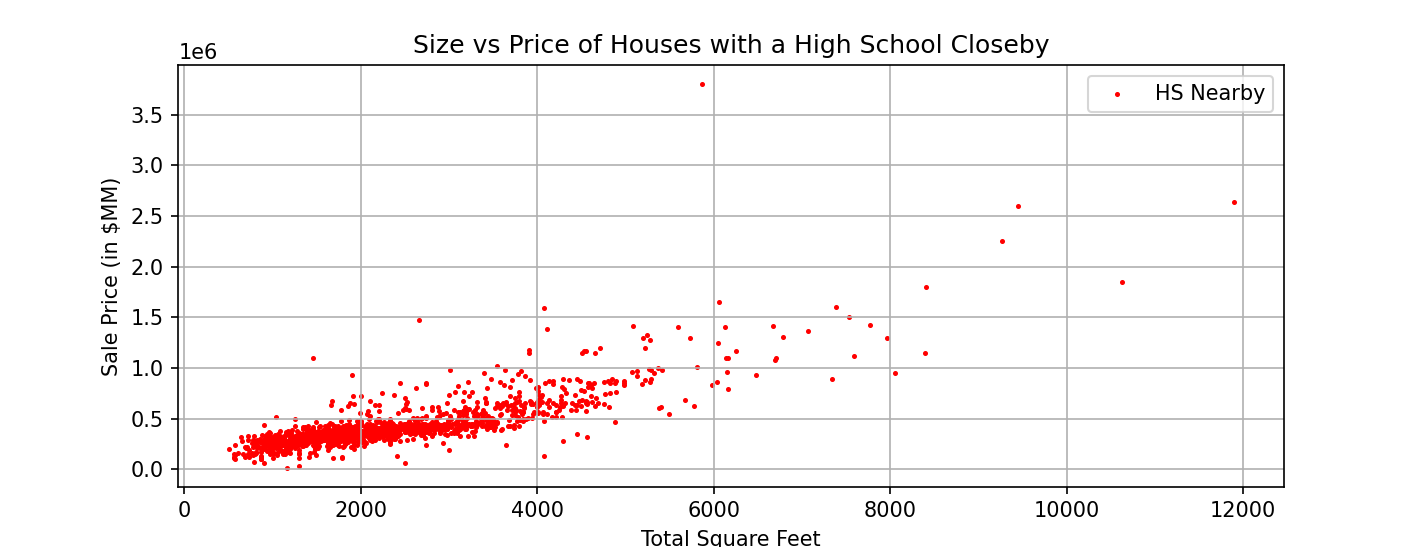

In [13]:
x_axis = data_df.loc[data_df['High School'].isna(), ["Total Sq Ft"]]
y_axis = data_df.loc[data_df['High School'].isna(), ["Sale Price"]]
plt.scatter(x_axis, y_axis, s=2, c='r', marker="o", label='HS Nearby')
plt.grid()
plt.legend(loc='best')
plt.title("Size vs Price of Houses with a High School Closeby")
plt.xlabel("Total Square Feet")
plt.ylabel("Sale Price (in $MM)")
plt.show()

<IPython.core.display.Javascript object>


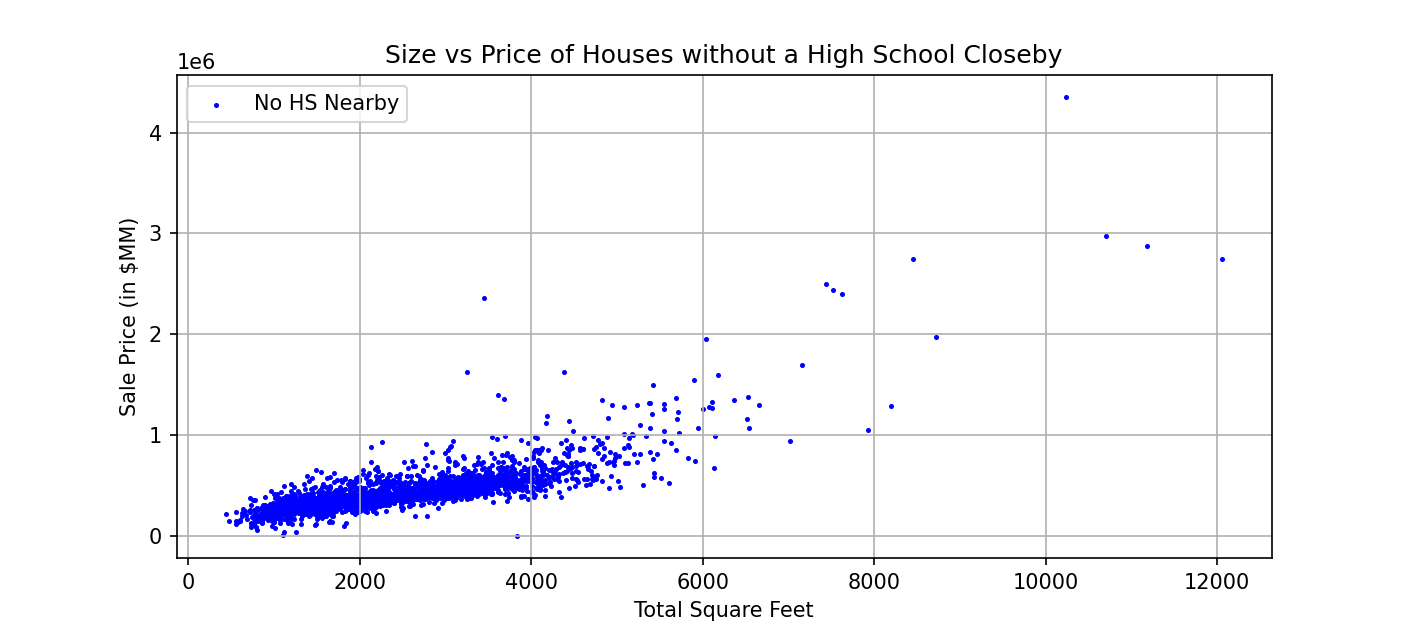

In [15]:
x_axis_2 = data_df.loc[data_df['High School'].notna(), ["Total Sq Ft"]]
y_axis_2 = data_df.loc[data_df['High School'].notna(), ["Sale Price"]]
plt.scatter(x_axis_2, y_axis_2, s=2, c='b', marker="o", label='No HS Nearby')
plt.grid()
plt.legend(loc='best')
plt.title("Size vs Price of Houses without a High School Closeby")
plt.xlabel("Total Square Feet")
plt.ylabel("Sale Price (in $MM)")
plt.show()

<IPython.core.display.Javascript object>


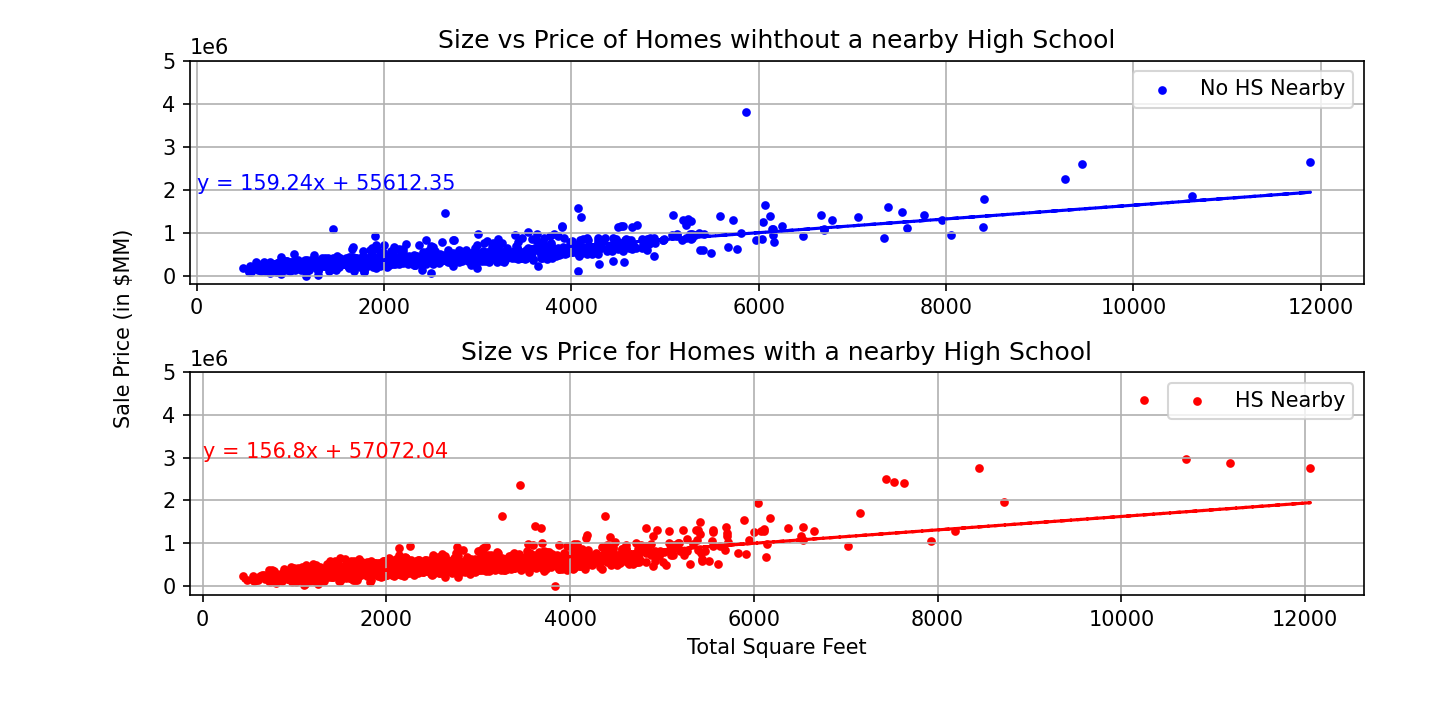

In [58]:
#Scatter Plot 1 total sq ft vs price
#Comparing to if there is a High School nearby vs. not
x_axis = nohs_df["Total Sq Ft"]
y_axis = nohs_df["Sale Price"]
x_axis_2 = hs_df["Total Sq Ft"]
y_axis_2 = hs_df["Sale Price"]

fig = plt.figure()
ax = fig.add_subplot(111) 
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)


(ax1slope, ax1intercept, ax1rvalue, ax1pvalue, ax1stderr) = st.linregress(x_axis, y_axis)
ax1_regress_values = x_axis * ax1slope + ax1intercept
ax1_line_eq = "y = " + str(round(ax1slope,2)) + "x + " + str(round(ax1intercept,2))
ax1.annotate(ax1_line_eq,(0,2000000),fontsize=10,color="blue")
ax1.plot(x_axis, ax1_regress_values,"b--")
ax1.scatter(x_axis, y_axis, s=10, c='b', marker="o", label='No HS Nearby')
ax1.grid()
ax1.set_title("Size vs Price of Homes wihthout a nearby High School")
ax1.set_yticks(np.arange(0,6000000,1000000))



(ax2slope, ax2intercept, ax2rvalue, ax2pvalue, ax2stderr) = st.linregress(x_axis_2, y_axis_2)
ax2_regress_values = x_axis_2 * ax2slope + ax2intercept
ax2_line_eq = "y = " + str(round(ax2slope,2)) + "x + " + str(round(ax2intercept,2))
ax2.annotate(ax2_line_eq,(0,3000000),fontsize=10,color="red")
ax2.plot(x_axis_2, ax2_regress_values,"r--")
ax2.scatter(x_axis_2, y_axis_2, s=10, c='r', marker="o", label='HS Nearby')
ax2.grid()
ax2.set_title("Size vs Price for Homes with a nearby High School")
ax2.set_yticks(np.arange(0,6000000,1000000))


ax1.legend(loc='best')
ax2.legend(loc='best')
ax.set_xlabel("Total Square Feet")
ax.set_ylabel("Sale Price (in $MM)")
fig.tight_layout()
plt.savefig("Images/graph2-hs-vs-no-hs")
plt.show()

In [54]:
noms_df = data_df[data_df['Middle School'].isna()]
noms_df.head()

,MLS ID,Sale Price,Close Date,Address,Zip Code,Total Sq Ft,Lot Size,Latitude,Longitude,High School,High School Rank,Middle School,Middle School Rank,Elementary School,Elementary School Rank,dollar/sqft
2,7312436,275000.0,2021-03-15,132 Hayden ST,80813,2503.0,9583.0,38.750711,-105.176383,Cripple Creek-Victor Junior-Senior High School,1.0,NaN,NaN,Cresson Elementary School,1.0,109.868158
4,4306524,410000.0,2021-03-12,6562 Tillamook DR,80925,1949.0,6600.0,38.8338816,-104.821363,Palmer High School,3.0,NaN,2.0,Coperni 2,NaN,210.364289
24,9951614,211000.0,2021-03-19,6611 Proud Eagle CT,80915,960.0,720.0,38.850986,-104.703877,John Mall High School,2.0,NaN,3.0,Rockrimmon Elementary School,2.0,219.791667
28,7641404,335000.0,2021-03-19,4324 Witches Hollow LN,80911,1648.0,5227.2,38.7697952,-104.744187,Mitchell High School,1.0,NaN,NaN,Pueblo Charter School For The Arts & Sciences,NaN,203.276699
31,8690811,330000.0,2021-03-16,4555 Borden DR,80911,1548.0,5000.0,38.7673718,-104.744050,Cripple Creek-Victor Junior-Senior High School,1.0,NaN,NaN,Widefield District 3 Preschool,NaN,213.178295


In [55]:
ms_df = data_df[data_df['Middle School'].notna()]
ms_df.head()

,MLS ID,Sale Price,Close Date,Address,Zip Code,Total Sq Ft,Lot Size,Latitude,Longitude,High School,High School Rank,Middle School,Middle School Rank,Elementary School,Elementary School Rank,dollar/sqft
0,2001944,240000.0,2021-03-15,4917 BlueStem DR,80917,1170.0,711.0,38.8976243,-104.737074,Doherty High School,2.0,Russell Middle School,2.0,Carver Elementary School,1.0,205.128205
1,8359484,237500.0,2021-03-12,54 Villa DR,81001,2087.0,6509.0,38.8654252,-104.863362,Coronado High School,3.0,Holmes Middle School,3.0,Howbert Elementary School,3.0,113.799713
3,1398523,566455.0,2021-03-18,6596 Wolf Gulch DR,80924,4714.0,9088.0,38.9603997,-104.703074,Liberty High School,4.0,Chinook Trail Middle School,NaN,Legacy Peak Elementary School,3.0,120.164404
5,3210548,425000.0,2021-03-17,10146 Moorcroft DR,80831,2848.0,11250.0,38.9765231,-104.628230,Falcon High School,3.0,North Middle School,3.0,NaN,3.0,149.227528
6,3748005,157000.0,2021-03-16,434 Valley Hi CR #D-24,80910,1072.0,0.0,38.8247919,-104.765845,Eastlake High School Of Colorado Springs,0.0,Falcon Middle School,1.0,Bennett Ranch Elementary School,0.0,146.455224


In [56]:
noes_df = data_df[data_df['Elementary School'].isna()]
noes_df.head()

,MLS ID,Sale Price,Close Date,Address,Zip Code,Total Sq Ft,Lot Size,Latitude,Longitude,High School,High School Rank,Middle School,Middle School Rank,Elementary School,Elementary School Rank,dollar/sqft
5,3210548,425000.0,2021-03-17,10146 Moorcroft DR,80831,2848.0,11250.0,38.9765231,-104.628230,Falcon High School,3.0,North Middle School,3.0,NaN,3.0,149.227528
20,4063233,215000.0,2021-03-17,4831 Sonata DR #A,80918,780.0,810.0,38.9017849,-104.765170,Community Prep Charter School,2.0,North Middle School,2.0,NaN,3.0,275.641026
26,6233204,295000.0,2021-03-15,718 Bryce DR,80910,1062.0,6890.0,38.8215759,-104.782838,South High School,0.0,Pueblo Academy Of Arts,NaN,NaN,1.0,277.777778
32,2691609,281000.0,2021-03-12,3976 Riviera GR #203,80922,1276.0,685.0,38.88881070000001,-104.704334,Discovery High School,2.0,Sabin Middle School,3.0,NaN,4.0,220.219436
36,2770106,350000.0,2021-03-19,7350 Woody Creek DR,80911,2529.0,6760.0,38.7242287,-104.683995,Mesa Ridge High School,2.0,Horizon Middle School,3.0,NaN,3.0,138.394622


In [57]:
es_df = data_df[data_df['Elementary School'].notna()]
es_df.head()

,MLS ID,Sale Price,Close Date,Address,Zip Code,Total Sq Ft,Lot Size,Latitude,Longitude,High School,High School Rank,Middle School,Middle School Rank,Elementary School,Elementary School Rank,dollar/sqft
0,2001944,240000.0,2021-03-15,4917 BlueStem DR,80917,1170.0,711.0,38.8976243,-104.737074,Doherty High School,2.0,Russell Middle School,2.0,Carver Elementary School,1.0,205.128205
1,8359484,237500.0,2021-03-12,54 Villa DR,81001,2087.0,6509.0,38.8654252,-104.863362,Coronado High School,3.0,Holmes Middle School,3.0,Howbert Elementary School,3.0,113.799713
2,7312436,275000.0,2021-03-15,132 Hayden ST,80813,2503.0,9583.0,38.750711,-105.176383,Cripple Creek-Victor Junior-Senior High School,1.0,NaN,NaN,Cresson Elementary School,1.0,109.868158
3,1398523,566455.0,2021-03-18,6596 Wolf Gulch DR,80924,4714.0,9088.0,38.9603997,-104.703074,Liberty High School,4.0,Chinook Trail Middle School,NaN,Legacy Peak Elementary School,3.0,120.164404
4,4306524,410000.0,2021-03-12,6562 Tillamook DR,80925,1949.0,6600.0,38.8338816,-104.821363,Palmer High School,3.0,NaN,2.0,Coperni 2,NaN,210.364289


<IPython.core.display.Javascript object>


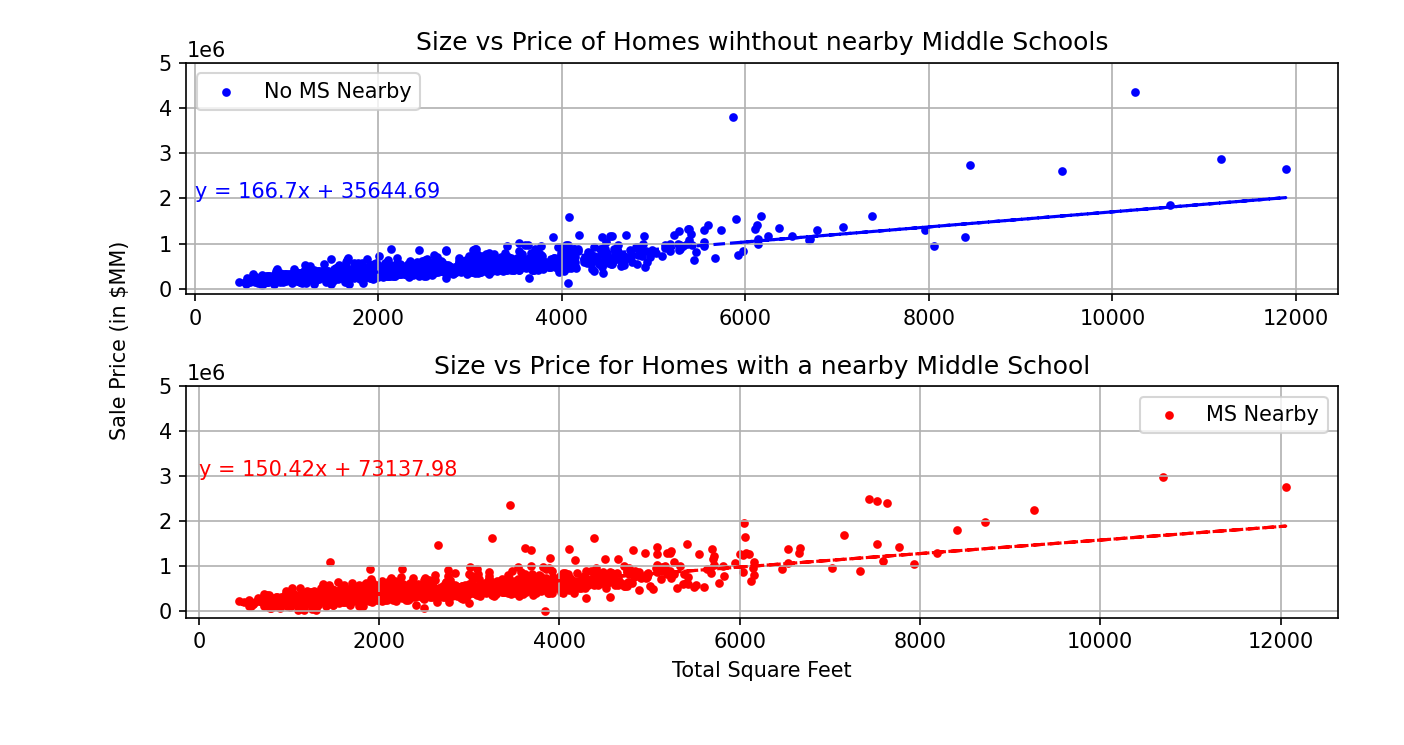

In [60]:
#Scatter Plot 2 total sq ft vs price
#Comparing to if there is a Middle School nearby vs. not
x_axis = noms_df["Total Sq Ft"]
y_axis = noms_df["Sale Price"]
x_axis_2 = ms_df["Total Sq Ft"]
y_axis_2 = ms_df["Sale Price"]

fig = plt.figure()
ax = fig.add_subplot(111) 
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)


(ax1slope, ax1intercept, ax1rvalue, ax1pvalue, ax1stderr) = st.linregress(x_axis, y_axis)
ax1_regress_values = x_axis * ax1slope + ax1intercept
ax1_line_eq = "y = " + str(round(ax1slope,2)) + "x + " + str(round(ax1intercept,2))
ax1.annotate(ax1_line_eq,(0,2000000),fontsize=10,color="blue")
ax1.plot(x_axis, ax1_regress_values,"b--")
ax1.scatter(x_axis, y_axis, s=10, c='b', marker="o", label='No MS Nearby')
ax1.grid()
ax1.set_title("Size vs Price of Homes wihthout nearby Middle Schools")
ax1.set_yticks(np.arange(0,6000000,1000000))



(ax2slope, ax2intercept, ax2rvalue, ax2pvalue, ax2stderr) = st.linregress(x_axis_2, y_axis_2)
ax2_regress_values = x_axis_2 * ax2slope + ax2intercept
ax2_line_eq = "y = " + str(round(ax2slope,2)) + "x + " + str(round(ax2intercept,2))
ax2.annotate(ax2_line_eq,(0,3000000),fontsize=10,color="red")
ax2.plot(x_axis_2, ax2_regress_values,"r--")
ax2.scatter(x_axis_2, y_axis_2, s=10, c='r', marker="o", label='MS Nearby')
ax2.grid()
ax2.set_title("Size vs Price for Homes with a nearby Middle School")
ax2.set_yticks(np.arange(0,6000000,1000000))


ax1.legend(loc='best')
ax2.legend(loc='best')
ax.set_xlabel("Total Square Feet")
ax.set_ylabel("Sale Price (in $MM)")
fig.tight_layout()
plt.savefig("Images/graph3-ms-vs-no-ms")
plt.show()

<IPython.core.display.Javascript object>


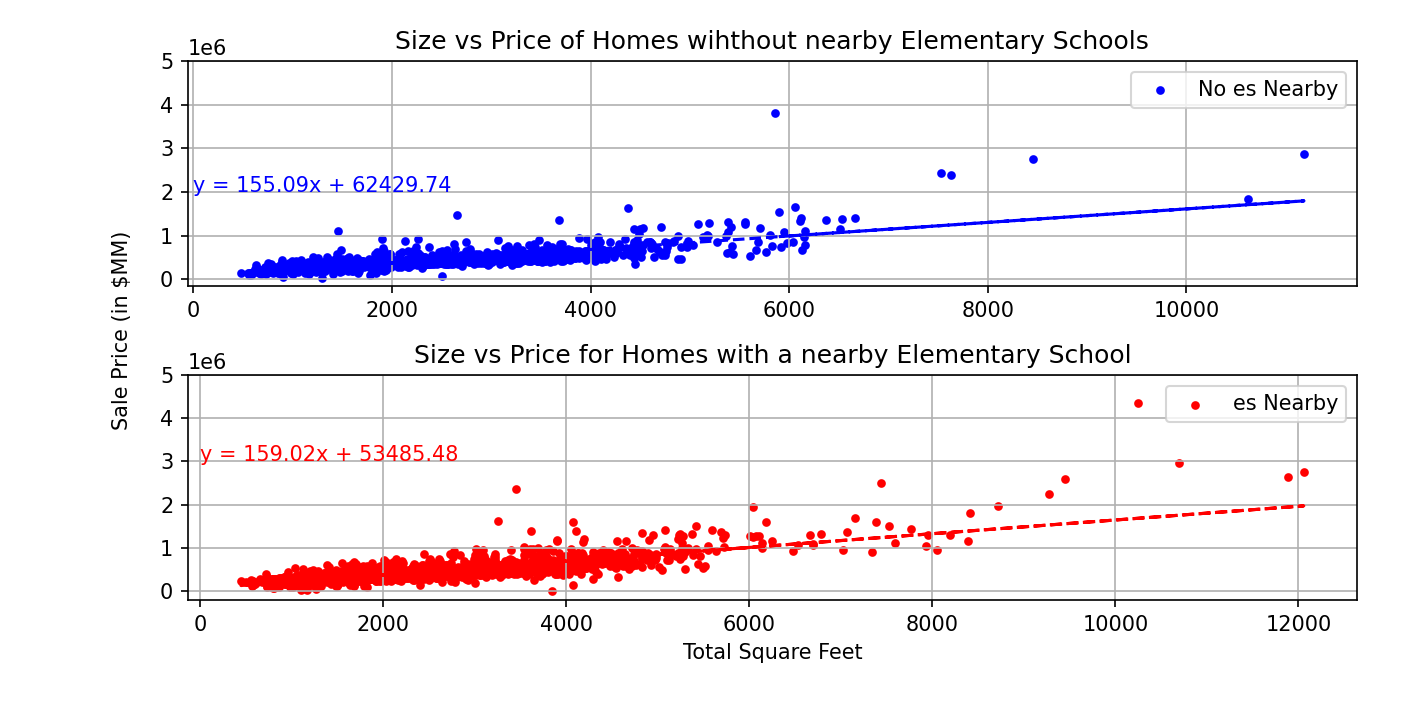

In [61]:
#Scatter Plot 3 total sq ft vs price
#Comparing to if there is a Elementary School nearby vs. not
x_axis = noes_df["Total Sq Ft"]
y_axis = noes_df["Sale Price"]
x_axis_2 = es_df["Total Sq Ft"]
y_axis_2 = es_df["Sale Price"]

fig = plt.figure()
ax = fig.add_subplot(111) 
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)


(ax1slope, ax1intercept, ax1rvalue, ax1pvalue, ax1stderr) = st.linregress(x_axis, y_axis)
ax1_regress_values = x_axis * ax1slope + ax1intercept
ax1_line_eq = "y = " + str(round(ax1slope,2)) + "x + " + str(round(ax1intercept,2))
ax1.annotate(ax1_line_eq,(0,2000000),fontsize=10,color="blue")
ax1.plot(x_axis, ax1_regress_values,"b--")
ax1.scatter(x_axis, y_axis, s=10, c='b', marker="o", label='No es Nearby')
ax1.grid()
ax1.set_title("Size vs Price of Homes wihthout nearby Elementary Schools")
ax1.set_yticks(np.arange(0,6000000,1000000))



(ax2slope, ax2intercept, ax2rvalue, ax2pvalue, ax2stderr) = st.linregress(x_axis_2, y_axis_2)
ax2_regress_values = x_axis_2 * ax2slope + ax2intercept
ax2_line_eq = "y = " + str(round(ax2slope,2)) + "x + " + str(round(ax2intercept,2))
ax2.annotate(ax2_line_eq,(0,3000000),fontsize=10,color="red")
ax2.plot(x_axis_2, ax2_regress_values,"r--")
ax2.scatter(x_axis_2, y_axis_2, s=10, c='r', marker="o", label='es Nearby')
ax2.grid()
ax2.set_title("Size vs Price for Homes with a nearby Elementary School")
ax2.set_yticks(np.arange(0,6000000,1000000))


ax1.legend(loc='best')
ax2.legend(loc='best')
ax.set_xlabel("Total Square Feet")
ax.set_ylabel("Sale Price (in $MM)")
fig.tight_layout()
plt.savefig("Images/graph4-es-vs-no-es")
plt.show()